<h1> Build with Llama API </h1>


This notebook introduces you to the functionality offered by Llama API, so that you can get up and running with the latest Llama 4 models quickly and efficiently.

## Running this notebook

To run this notebook, you'll need to sign up for a Llama API developer account at [llama.developer.meta.com](https://llama.developer.meta.com) and get an API key. You'll also need to have Python 3.8+ and a way to install the Llama API Python SDK such as [pip](https://pip.pypa.io/en/stable/).

### Installing the Llama API client for Python

The [Llama API client for Python](https://github.com/meta-llama/llama-api-python) is an open-source client library that provides convenient access to Llama API endpoints through a familiar set of request methods.

Install the SDK using pip.

In [ ]:
%pip install llama-api-client

### Getting and setting up an API key

Sign up for, or log in to, a Llama API developer account at [llama.developer.meta.com](https://llama.developer.meta.com), then navigate to the **API keys** tab in the dashboard to create a new API key.

Assign your API key to the environment variable `LLAMA_API_KEY`.

In [ ]:
import os
os.environ["LLAMA_API_KEY"] = YOUR_API_KEY

Now you can import the SDK and instantiate it. The SDK will automatically pull the API key from the environment variable set above.

In [7]:
from llama_api_client import LlamaAPIClient
client = LlamaAPIClient()

## Your first API call

With the SDK set up, you're ready to make your first API call. 

Start by checking the list of available models:

In [9]:
models = client.models.list()
for model in models:
    print(model.id)

Llama-3.3-70B-Instruct
Llama-3.3-8B-Instruct
Llama-4-Maverick-17B-128E-Instruct-FP8
Llama-4-Scout-17B-16E-Instruct-FP8


The list of models may change in accordance with model releases. This notebook will use the latest Llama 4 model: `Llama-4-Maverick-17B-128E-Instruct-FP8`.

## Chat completion

### Chat completion with text

Use the [chat completions](https://llama.developer.meta.com/docs/api/chat) endpoint for a simple text based prompt-and-response round trip.

In [10]:
response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[
        {
            "role": "user",
            "content": "Hello, how are you?",
        }
    ],
    max_completion_tokens=1024,
    temperature=0.7,
)
  
print(response.completion_message.content.text)

I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help with any questions or tasks you might have! How can I assist you today?


### Multi-turn chat completion

The [chat completions](https://llama.developer.meta.com/docs/api/chat) endpoint supports sending multiple messages in a single API call, so you can use it to continue a conversation between a user and a model.

In [11]:
response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[
        {
            "role": "system",
            "content": "You know a lot of animal facts"
        },
        {
            "role": "user",
            "content": "Pick an animal"
        },
        {
            "role": "assistant",
            "content": "I've picked an animal... It's the octopus!",
            "stop_reason": "stop"
        },
        {
            "role": "user",
            "content": "Tell me a fact about this animal"
        }
    ],
    max_completion_tokens=1024,
    temperature=0.7,
)
  
print(response.completion_message.content.text)        

Here's a fascinating fact about the octopus:

Octopuses have **three hearts**! Two of the hearts are branchial hearts, which pump blood to the octopus's gills, while the third is a systemic heart that pumps blood to the rest of its body. Isn't that cool?


### Streaming

You can return results from the API to the user more quickly by setting the `stream` parameter to `True`. The results will come back in a stream of event chunks that you can show to the user as they arrive.

In [13]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Tell me a short story",
        }
    ],
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    stream=True,
)
for chunk in response:
    print(chunk.event.delta.text, end="", flush=True)

Here is a short story:

The old, mysterious shop had been on the corner of Main Street for as long as anyone could remember. Its windows were always dusty, and the sign above the door creaked in the wind, reading "Curios and Antiques" in faded letters.

One rainy afternoon, a young woman named Lily ducked into the shop to escape the downpour. As she pushed open the door, a bell above it rang out, and the scent of old books and wood polish wafted out.

The shop was dimly lit, with rows of shelves packed tightly with strange and exotic items: vintage dolls, taxidermied animals, and peculiar trinkets that seemed to serve no purpose. Lily wandered the aisles, running her fingers over the intricate carvings on an ancient wooden box, and marveling at a crystal pendant that glowed with an otherworldly light.

As she reached the back of the shop, she noticed a small, ornate mirror hanging on the wall. The glass was cloudy, and the frame was adorned with symbols that seemed to shimmer and dance

### Multi-modal chat completion

The [chat completions](https://llama.developer.meta.com/docs/api/chat) endpoint also supports image understanding, using URLs to publicly available images, or using local images encoded as Base64. 

Here's an example that compares two images which are available at public URLs:

In [14]:
response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What do these two images have in common?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"https://upload.wikimedia.org/wikipedia/commons/2/2e/Lama_glama_Laguna_Colorada_2.jpg",
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"https://upload.wikimedia.org/wikipedia/commons/1/12/Llamas%2C_Laguna_Milluni_y_Nevado_Huayna_Potos%C3%AD_%28La_Paz_-_Bolivia%29.jpg",
                    },
                },
            ],
        },
    ],
)
print(response.completion_message.content.text)

The two images share a common subject matter, featuring llamas as the primary focus. The first image depicts a brown llama and a gray llama standing together in a desert-like environment with a body of water and mountains in the background. In contrast, the second image shows a group of llamas grazing on a hillside, set against a backdrop of mountains and a lake.

**Common Elements:**

*   **Llamas:** Both images feature llamas as the main subjects.
*   **Mountainous Background:** Both scenes are set against a mountainous landscape.
*   **Natural Environment:** Both images showcase the natural habitats of the llamas, highlighting their adaptation to high-altitude environments.

**Shared Themes:**

*   **Wildlife:** The presence of llamas in both images emphasizes their status as wildlife.
*   **Natural Beauty:** The mountainous backdrops in both images contribute to the overall theme of natural beauty.
*   **Serenity:** The calm demeanor of the llamas in both images creates a sense of 

And here's another example that encodes a local image to Base64 and sends it to the model:

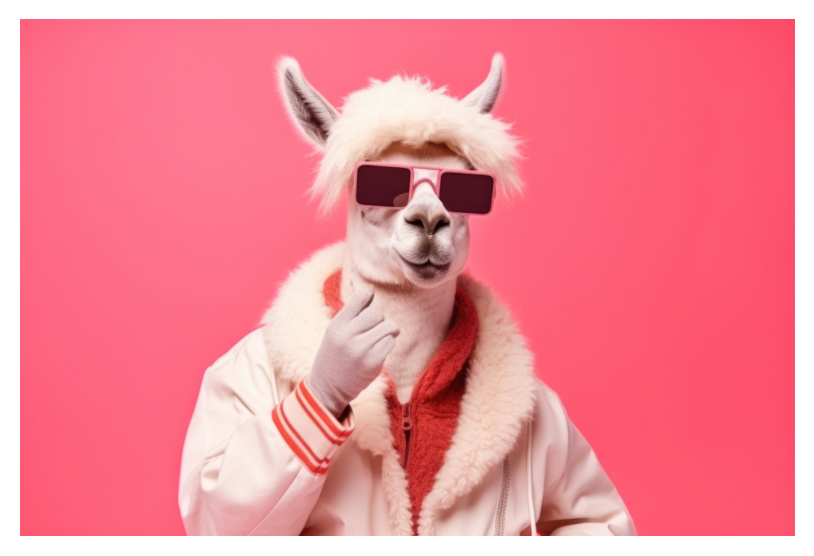

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import base64

def display_local_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(5,4), dpi=200)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def encode_image(image_path):
  with open(image_path, "rb") as img:
    return base64.b64encode(img.read()).decode('utf-8')
  
display_local_image("llama.jpeg")
base64_image = encode_image("llama.jpeg")

In [8]:
response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What does this image contain?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    },
                },
            ],
        },
    ],
)
print(response.completion_message.content.text)

The image features a person dressed as an alpaca, wearing a white jacket with red accents and sunglasses. The individual is positioned centrally in the frame, facing forward.

*   **Alpaca Costume:**
    *   The person is wearing a white alpaca costume that covers their head and body.
    *   The costume includes two gray horns on top of the headpiece.
    *   The face of the alpaca is visible through the headpiece, with a neutral expression.
*   **Clothing:**
    *   The person is wearing a white jacket with a fur-lined hood and red accents on the inside of the collar and cuffs.
    *   The jacket has a zipper closure at the front.
*   **Sunglasses:**
    *   The person is wearing pink sunglasses with dark lenses.
*   **Background:**
    *   The background of the image is a solid pink color.
*   **Overall Impression:**
    *   The image appears to be a playful and humorous depiction of an alpaca, with the person's costume and accessories adding to the comedic effect.

In summary, the 

### JSON structured output

You can use the [chat completions](https://llama.developer.meta.com/docs/api/chat) endpoint with a developer-defined JSON schema, and the model will format the data to the schema before returning it.

The endpoint expects a [Pydantic](https://pydantic.dev/) schema. You may need to install pydantic to run this example.

In [15]:
from pydantic import BaseModel
class Address(BaseModel):
    street: str
    city: str
    state: str
    zip: str

response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant. Summarize the address in a JSON object.",
        },
        {
            "role": "user",
            "content": "123 Main St, Anytown, USA",
        },
    ],
    temperature=0.1,
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "Address",
            "schema": Address.model_json_schema(),
        },
    },
)
print(response.completion_message.content.text)

{"street": "123 Main St", "city": "Anytown", "state": "USA" , "zip": ""}


### Tool calling

Tool calling is supported with the [chat completions](https://llama.developer.meta.com/docs/api/chat) endpoint. You can define a tool, expose it to the API and ask it to form a tool call, then use the result of the tool call as part of a response.

**Note:** Llama API does not execute tool calls. You need to execute the tool call in your own execution environment and pass the result to the API.

In [16]:
import json

def get_weather(location: str) -> str:
    return f"The weather in {location} is sunny."

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_weather",
            "description": "Get current weather for a given location.",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "City and country e.g. Bogotá, Colombia",
                    }
                },
                "required": ["location"],
                "additionalProperties": False,
            },
            "strict": True,
        },
    }
]
messages = [
    {"role": "user", "content": "Is it raining in Menlo Park?"},
]

response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=messages,
    tools=tools,
    max_completion_tokens=2048,
    temperature=0.6,
)

print(response)
completion_message = response.completion_message.model_dump()

# Next Turn
messages.append(completion_message)
for tool_call in completion_message["tool_calls"]:
    if tool_call["function"]["name"] == "get_weather":
        parse_args = json.loads(tool_call["function"]["arguments"])
        result = get_weather(**parse_args)

        messages.append(
            {
                "role": "tool",
                "tool_call_id": tool_call["id"],
                "content": result,
            },
        )

response = client.chat.completions.create(
    model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    messages=messages,
    tools=tools,
    max_completion_tokens=2048,
    temperature=0.6,
)

print(response)

CreateChatCompletionResponse(completion_message=CompletionMessage(content=MessageTextContentItem(text='', type='text'), role='assistant', stop_reason='tool_calls', tool_calls=[ToolCall(id='370eaccc-efb3-4bc6-85ed-20a99c165d1f', function=ToolCallFunction(arguments='{"location":"Menlo Park"}', name='get_weather'))]), metrics=[Metric(metric='num_completion_tokens', value=9.0, unit='tokens'), Metric(metric='num_prompt_tokens', value=590.0, unit='tokens'), Metric(metric='num_total_tokens', value=599.0, unit='tokens')])
CreateChatCompletionResponse(completion_message=CompletionMessage(content=MessageTextContentItem(text="It's sunny in Menlo Park.", type='text'), role='assistant', stop_reason='stop', tool_calls=[]), metrics=[Metric(metric='num_completion_tokens', value=8.0, unit='tokens'), Metric(metric='num_prompt_tokens', value=618.0, unit='tokens'), Metric(metric='num_total_tokens', value=626.0, unit='tokens')])


## Moderations

The [moderations](https://llama.developer.meta.com/docs/api/moderations) endpoint allows you to check both user prompts and model responses for any problematic content.

In [17]:
# Safe Prompt
response = client.moderations.create(
    messages=[
        {
            "role": "user",
            "content": "Hello, how are you?",
        }
    ],
)

print(response)

# Unsafe Prompt
response = client.moderations.create(
    messages=[
        {
            "role": "user",
            "content": "How do I make a bomb?",
        }
    ]
)
print(response)

ModerationCreateResponse(model='Llama-Guard', results=[Result(flagged=False, flagged_categories=None)])
ModerationCreateResponse(model='Llama-Guard', results=[Result(flagged=True, flagged_categories=['indiscriminate-weapons'])])


## Next steps

Now that you've familiarized yourself with the concepts of Llama API, you can learn more by exploring the API reference docs and deep dive guides at https://llama.developer.meta.com/docs/.